### Lib


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import squarify

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [3]:
df = pd.read_csv("../data/Superstore.csv",encoding='windows-1252')
df.head().style.set_properties(**{"background-color": "#ff8282","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2,0.000000,41.913600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.940000,3,0.000000,219.582000
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.620000,2,0.000000,6.871400
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5,0.450000,-383.031000
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.200000,2.516400


### What is the Top selling products in the Store ?

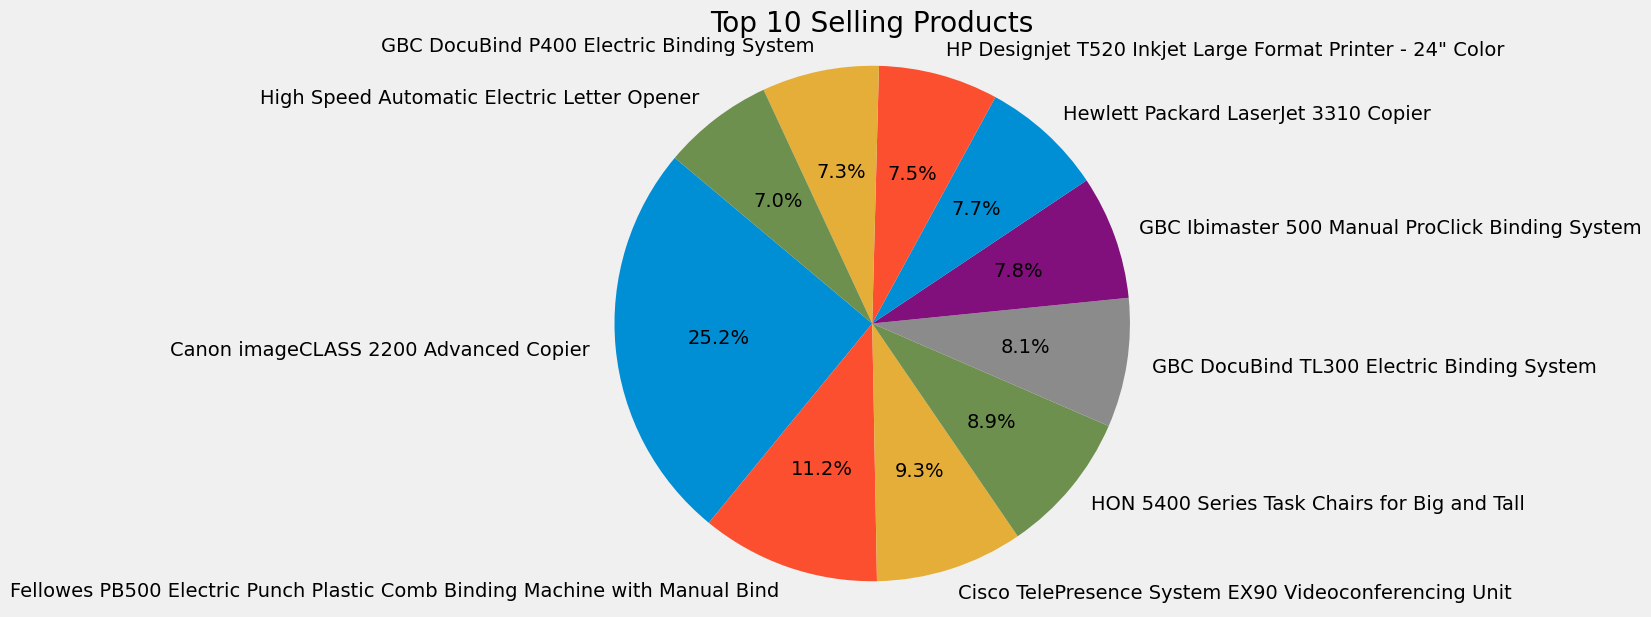

In [4]:
# Aggregate sales data by Product (ID and Name)
topSellingProducts = df.groupby(['Product ID', 'Product Name'])['Sales'].sum().reset_index()

# Sort the products by total sales 
topSellingProducts = topSellingProducts.sort_values(by='Sales', ascending=False)

# Get the top 10 selling products
top10 = topSellingProducts.head(10)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top10['Sales'], labels=top10['Product Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Selling Products')
plt.axis('equal') 
plt.show()

#### What is the sales & profit  trend over time ?


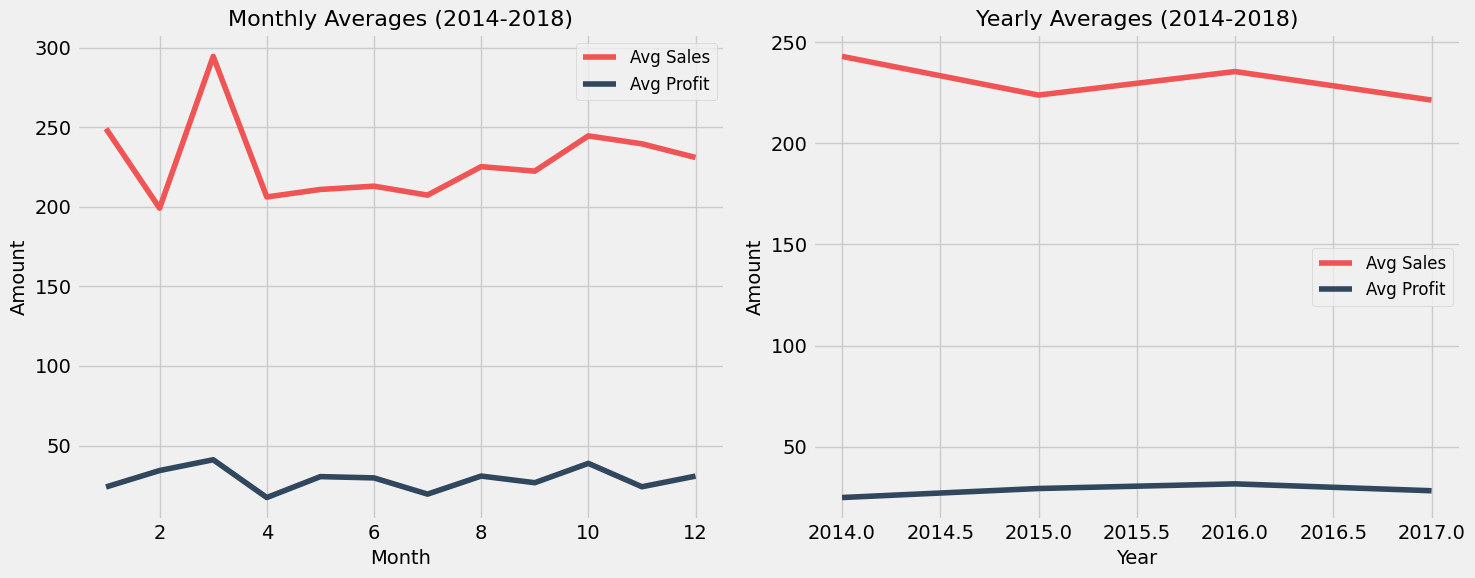

In [55]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date'])
df_line['Month'] = df['Order Date'].dt.month
df_line['Year'] = df['Order Date'].dt.year

# Group by month and calculate the mean
df_line['Month'] = df_line['Order Date'].dt.month
df_line_month = df_line.groupby('Month').mean()

# Group by year and calculate the mean
df_line['Year'] = df_line['Order Date'].dt.year
df_line_year = df_line.groupby('Year').mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=[15, 6])

# Plot for Monthly Averages
axs[0].plot(df_line_month.index, 'Sales', data=df_line_month, color='#F05454', label='Avg Sales') 
axs[0].plot(df_line_month.index, 'Profit', data=df_line_month, color='#30475E', label='Avg Profit') 
axs[0].set_title("Monthly Averages (2014-2018)", size=16)
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Amount', fontsize=14)
axs[0].legend(fontsize=12)

# Plot for Yearly Averages
axs[1].plot(df_line_year.index, 'Sales', data=df_line_year, color='#F05454', label='Avg Sales') 
axs[1].plot(df_line_year.index, 'Profit', data=df_line_year, color='#30475E', label='Avg Profit') 
axs[1].set_title("Yearly Averages (2014-2018)", size=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Amount', fontsize=14)
axs[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()





##### Which category of products generates the highest revenue and profit?

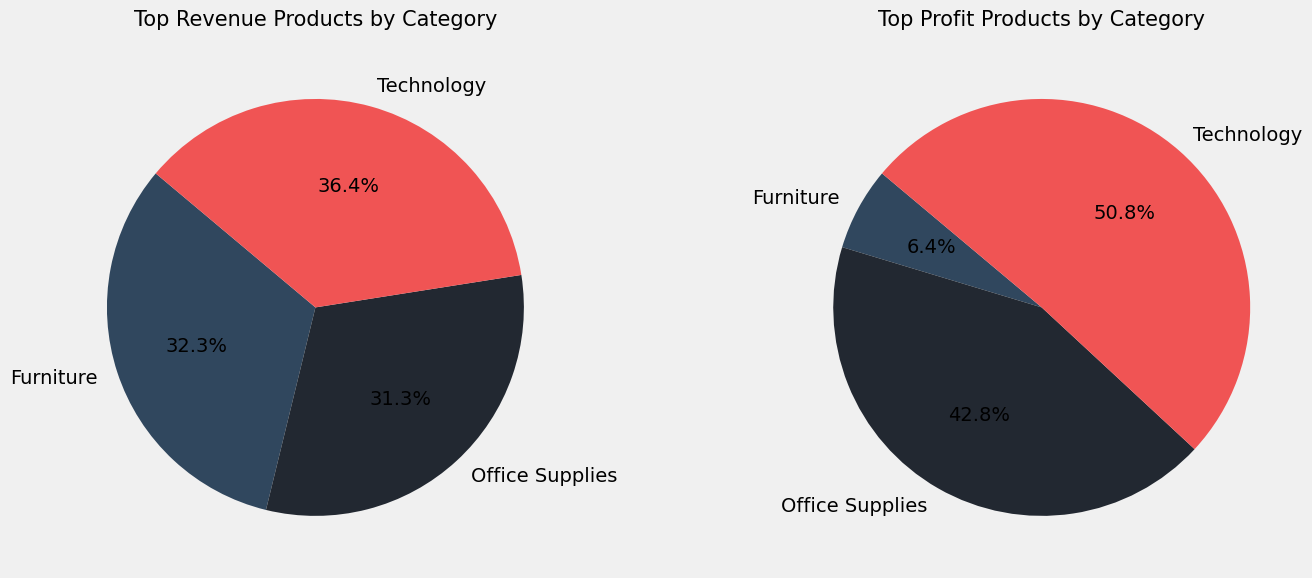

In [59]:
# Grouping by Category and calculating sum of Sales and Profit
topRevenueProduct = df.groupby(['Category'])['Sales'].sum()
topProfitProduct = df.groupby(['Category'])['Profit'].sum()

# Define colors
colors = ['#30475E', '#222831','#F05454', '#DDDDDD']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for top revenue products
axs[0].pie(topRevenueProduct, labels=topRevenueProduct.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title("Top Revenue Products by Category", size=15, pad=15)

# Plot for top profit products
axs[1].pie(topProfitProduct, labels=topProfitProduct.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title("Top Profit Products by Category", size=15, pad=15)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Which region generates the most sales?

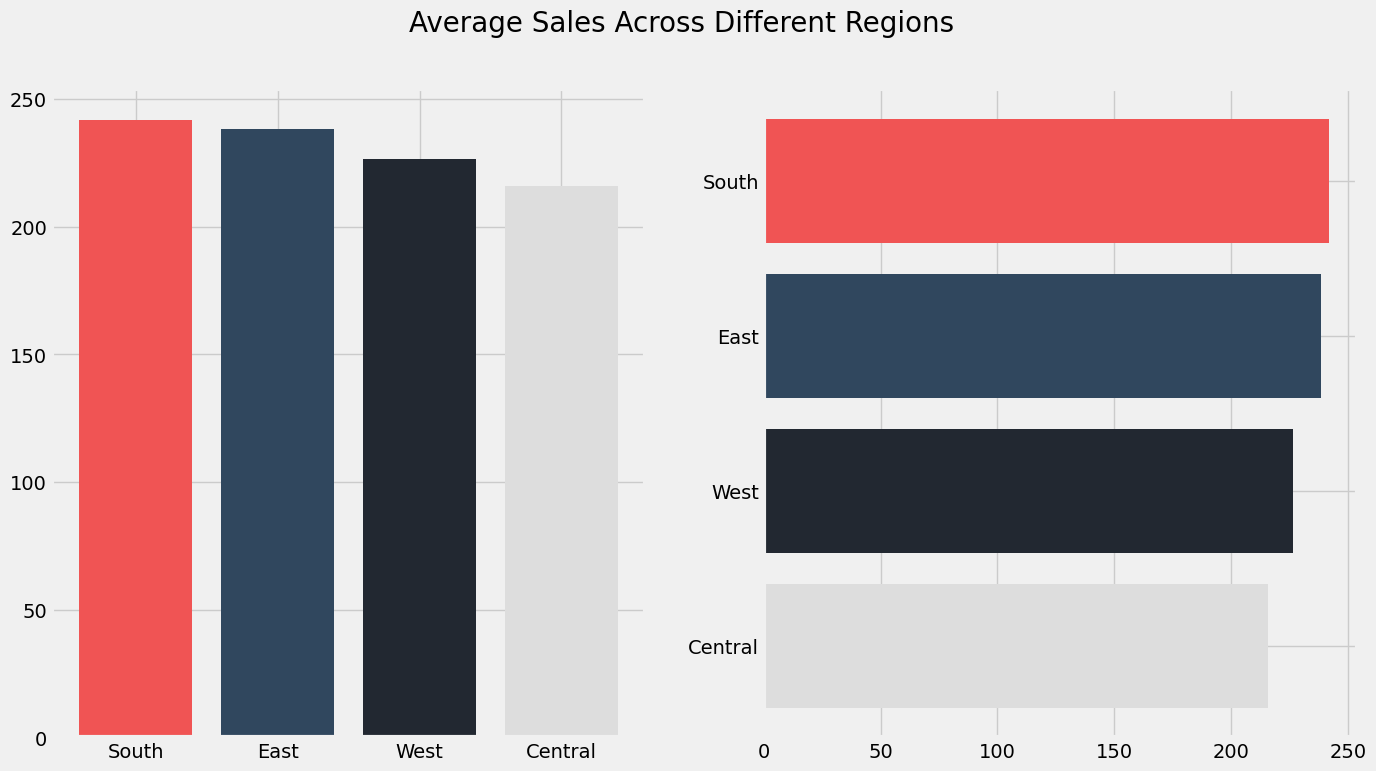

In [65]:
topSalesRegion = df[['Region','Sales']]

topSalesRegion = topSalesRegion.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[15,8]) 

plt.suptitle("Average Sales Across Different Regions", size=20)

plt.subplot(1,2,1)
plt.bar(x=topSalesRegion.index, height='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=topSalesRegion)

plt.subplot(1,2,2)
plt.barh(y=topSalesRegion.index, width='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=topSalesRegion)
plt.gca().invert_yaxis() 

plt.show()

#### What is the impact of discounts and promotions on sales?


##### Impact of discounts on sales


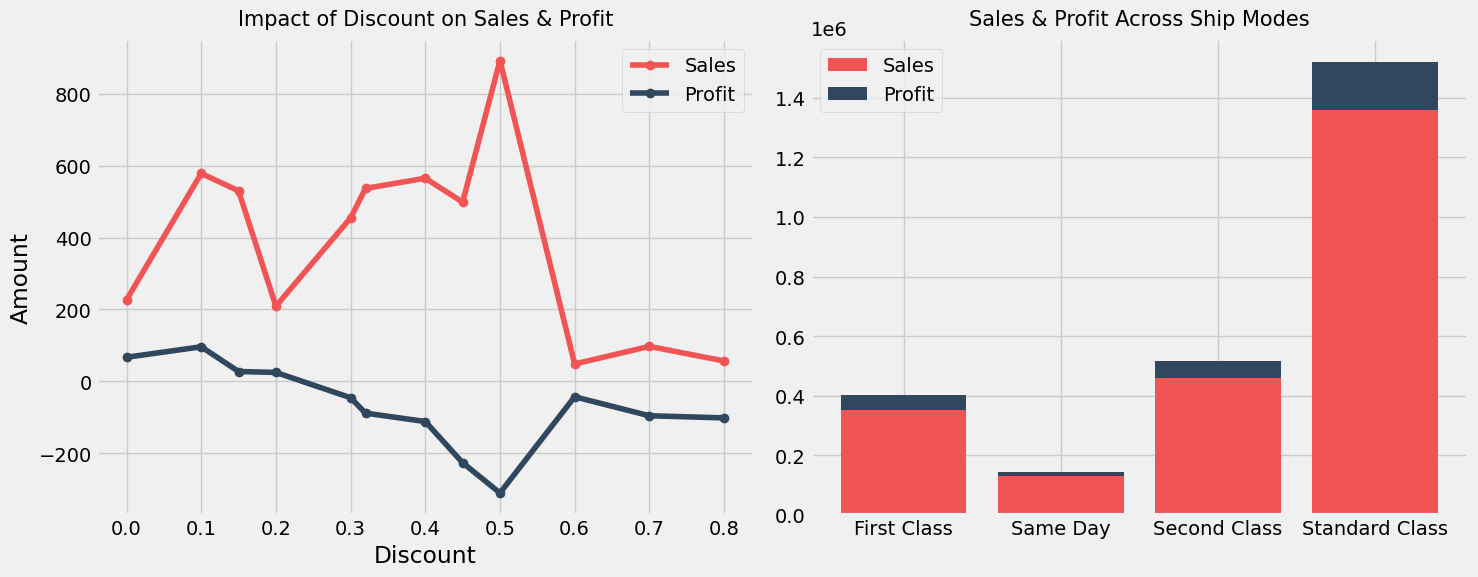

In [88]:
discountsOnSalesAndProfit = df[['Discount','Sales','Profit']]
discountsOnSalesAndProfit = discountsOnSalesAndProfit.groupby(['Discount']).mean().reset_index()

ShipModesOnSalesAndProfit = df[['Ship Mode','Sales','Profit']]
ShipModesOnSalesAndProfit = ShipModesOnSalesAndProfit.groupby(['Ship Mode']).sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axs[0]
ax1.plot(discountsOnSalesAndProfit['Discount'], discountsOnSalesAndProfit['Sales'], marker='o', color='#F05454', label='Sales')
ax1.plot(discountsOnSalesAndProfit['Discount'], discountsOnSalesAndProfit['Profit'], marker='o', color='#30475E', label='Profit')
ax1.set_title("Impact of Discount on Sales & Profit", size=15, pad=10)
ax1.set_xlabel("Discount")
ax1.set_ylabel("Amount")
ax1.legend()
ax1.grid(True)

ax2 = axs[1]
ax2.bar(x=ShipModesOnSalesAndProfit['Ship Mode'], height=ShipModesOnSalesAndProfit['Sales'], color='#F05454')
ax2.bar(x=ShipModesOnSalesAndProfit['Ship Mode'], height=ShipModesOnSalesAndProfit['Profit'], bottom=ShipModesOnSalesAndProfit['Sales'], color='#30475E')
ax2.set_title("Sales & Profit Across Ship Modes", size=15, pad=10)
ax2.legend(['Sales','Profit'])

plt.tight_layout()
plt.show()